In [1]:
include(joinpath("..","src","setup.jl"))

┌ Info: Recompiling stale cache file /Users/davidlittle/.julia/compiled/v1.0/AuditoryBistabilityLE/RqG8S.ji for AuditoryBistabilityLE [7e25a372-ade5-11e8-17af-a30e5a9e2c28]
└ @ Base loading.jl:1187


RObject{VecSxp}
$rcalljl_options
$rcalljl_options$height
[1] 360

$rcalljl_options$width
[1] 432




In [2]:
settings = TOML.parsefile("../src/settings.toml")
settings["stimulus"] = Dict("ramp_len_ms" => 10, "pattern" => "aba_", "tone_len_fraction" => 0.41666666)
settings["bandwidth_ratio"]["threshold"] = 1.5
settings["bandwidth_ratio"]["full_band_ratio"] = 4.1

4.1

# Object-level

In [3]:
paramfile = joinpath("..","data","count_lengths","run_2018-10-04","individual_levels_params.feather")
params = getparams(paramfile) do i,row
  abs(row[:t_c_m] - 32) < 1 &&
  abs(row[:t_c_a] - 11) < 1 &&
  row[:Δf] == 6
end

500 ms

In [4]:
result = []
for d in [3,6,12]
  @show d
  params[:Δf] = d
  push!(result,bistable_model(50,params,settings,intermediate_results=true))
end

d = 3
full_band_ratio = 4.1


Internal error: encountered unexpected error in runtime:
BoundsError(a=Array{Core.Compiler.NewNode, (0,)}[], i=(1,))
rec_backtrace at /Users/osx/buildbot/slave/package_osx64/build/src/stackwalk.c:94
record_backtrace at /Users/osx/buildbot/slave/package_osx64/build/src/task.c:246 [inlined]
jl_throw at /Users/osx/buildbot/slave/package_osx64/build/src/task.c:577
jl_bounds_error_ints at /Users/osx/buildbot/slave/package_osx64/build/src/rtutils.c:187
getindex at ./array.jl:731 [inlined]
getindex at ./compiler/ssair/ir.jl:677 [inlined]
abstract_eval_ssavalue at ./compiler/ssair/queries.jl:54 [inlined]
argextype at ./compiler/utilities.jl:181
is_known_call at ./compiler/optimize.jl:392 [inlined]
is_known_call at ./compiler/optimize.jl:389 [inlined]
is_tuple_call at ./compiler/ssair/queries.jl:70 [inlined]
lift_leaves at ./compiler/ssair/passes.jl:282
getfield_elim_pass! at ./compiler/ssair/passes.jl:652
run_passes at ./compiler/ssair/driver.jl:123
optimize at ./compiler/optimize.jl:162
typei

d = 6


┌ Info: 4.38% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:45


full_band_ratio = 4.1
d = 12


┌ Info: 26.46% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:45


full_band_ratio = 4.1


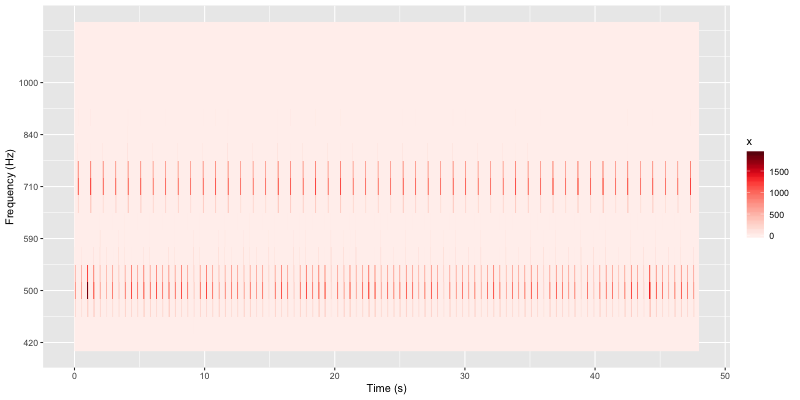

RObject{VecSxp}


In [5]:
rplot(result[2].primary_source)

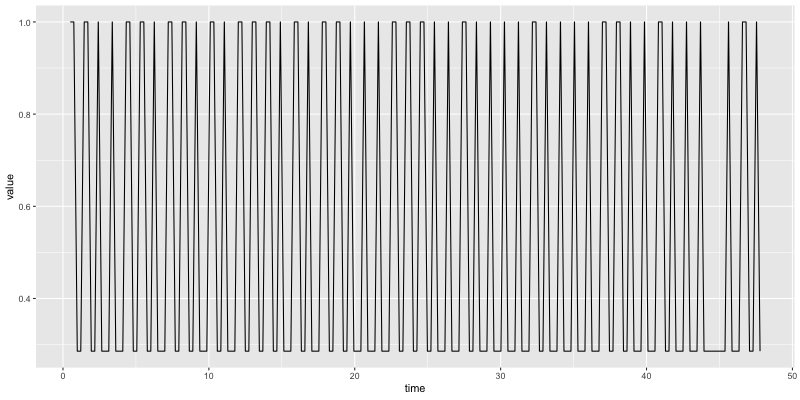

RObject{VecSxp}


In [6]:
rplot(result[2].percepts.ratio)

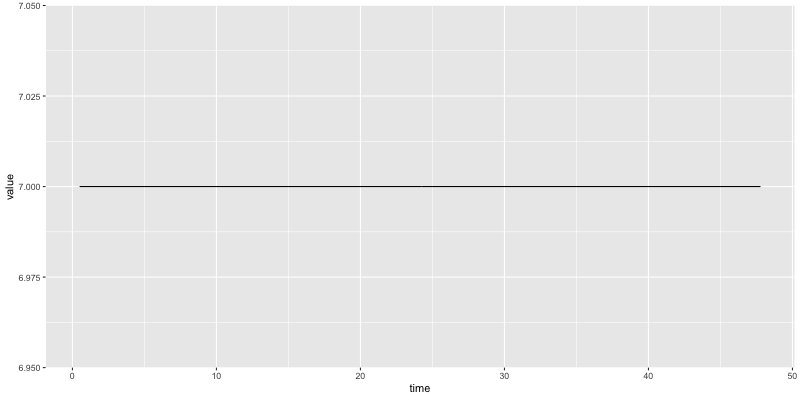

RObject{VecSxp}


In [7]:
rplot(result[2].percepts.tband)

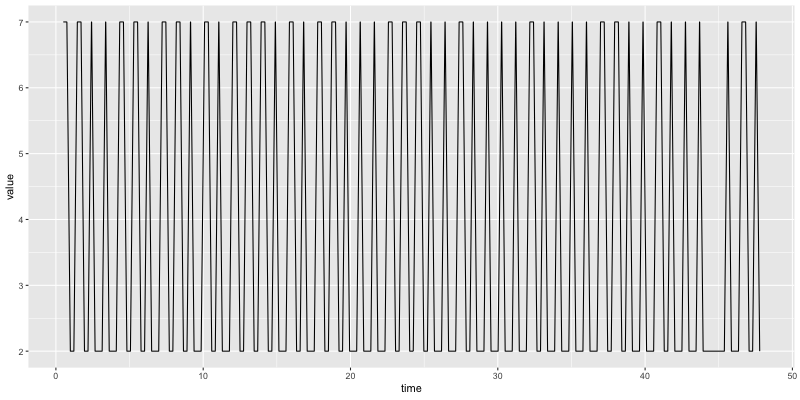

RObject{VecSxp}


In [8]:
rplot(result[2].percepts.sband)

**NEXT STEP**: check on the reuslts for the other two types of model

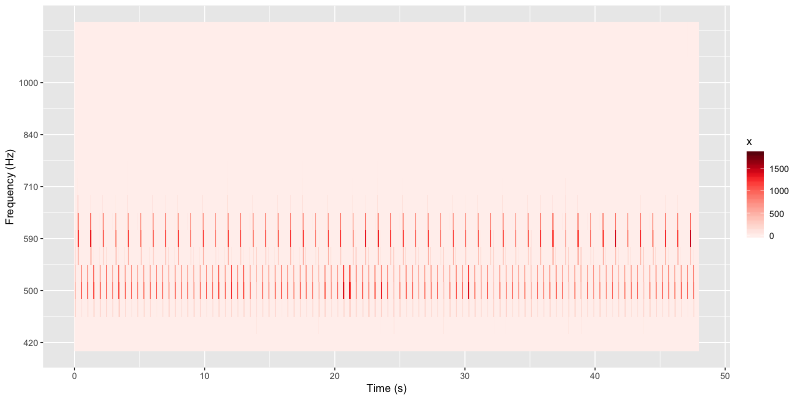

RObject{VecSxp}


In [9]:
rplot(result[1].primary_source)

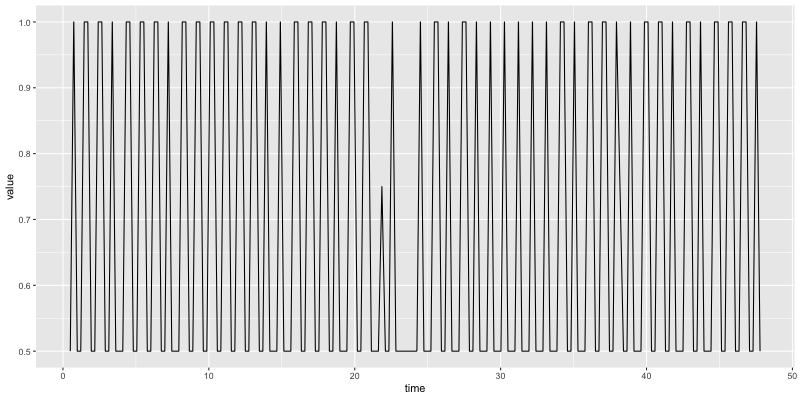

RObject{VecSxp}


In [10]:
rplot(result[1].percepts.ratio)

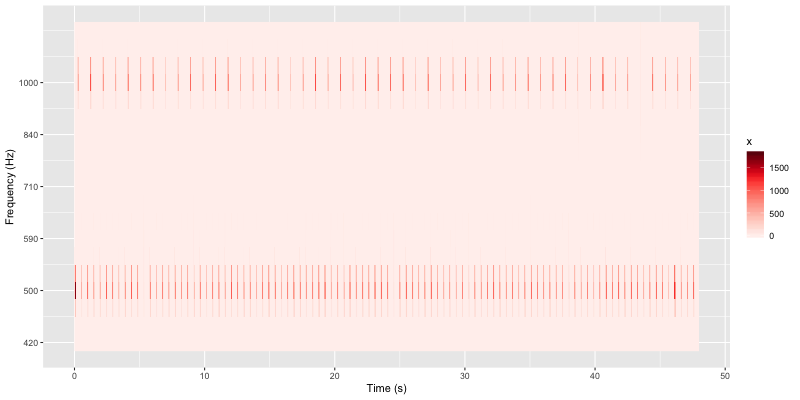

RObject{VecSxp}


In [11]:
rplot(result[3].primary_source)

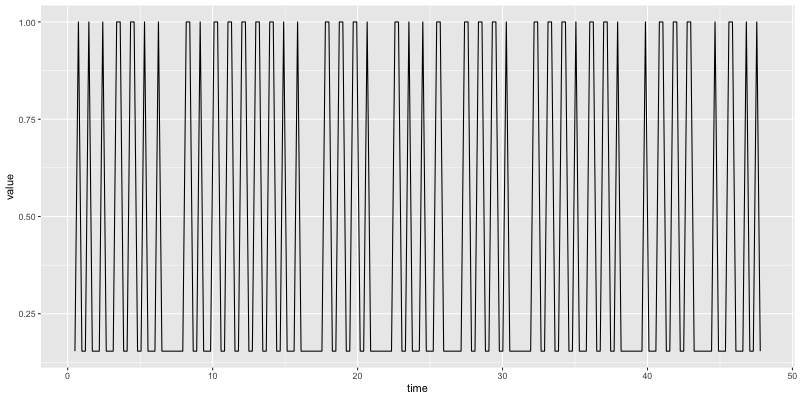

RObject{VecSxp}


In [12]:
p = rplot(result[3].percepts.ratio)

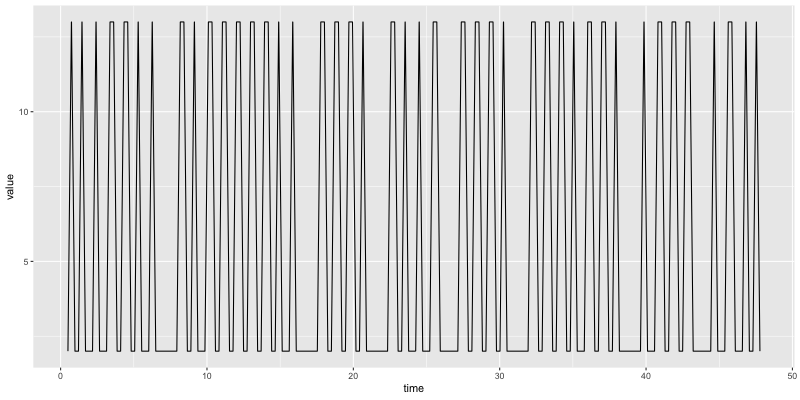

RObject{VecSxp}


In [13]:
rplot(result[3].percepts.sband)

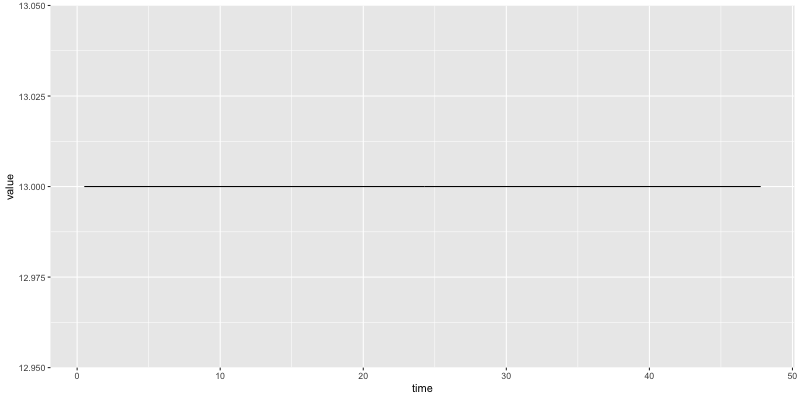

RObject{VecSxp}


In [14]:
rplot(result[3].percepts.tband)

This looks pretty promising! Let's make sure it works with the other three levels

# Cortical-level

In [15]:
params = getparams(paramfile) do i,row
  abs(row[:s_c_m] - 56) < 1 &&
  abs(row[:s_c_a] - 25) < 1 &&
  row[:Δf] == 6
end

Dict{Symbol,Number} with 35 entries:
  :s_W_m_σ   => 15.0
  :s_τ_x     => 500.0 ms
  :f_τ_m     => 350.0 ms
  :t_W_m_σ_N => 3.0
  :f_τ_x     => 500.0 ms
  :t_τ_σ     => 500.0 ms
  :f_τ_σ     => 500.0 ms
  :Δf        => 6
  :s_τ_a     => 3000.0 ms
  :t_τ_x     => 500.0 ms
  :s_W_m_c   => 6.0
  :f_W_m_c   => 6.0
  :t_W_m_σ_ϕ => 7.0
  :t_τ_m     => 350.0 ms
  :t_τ_a     => 3000.0 ms
  :s_c_a     => 25.1189
  :t_c_σ     => 0.0
  :s_c_x     => 3.0
  :s_τ_m     => 350.0 ms
  :Δt        => 240.0 ms
  :s_c_σ     => 0.2
  :f_τ_a     => 3000.0 ms
  :s_c_m     => 56.2341
  :f_c_a     => 0.0
  :t_W_m_c   => 6.0
  ⋮          => ⋮

In [16]:
result = []
for d in [3,6,12]
  @show d
  params[:Δf] = d
  push!(result,bistable_model(50,params,settings,intermediate_results=true))
end

d = 3


┌ Info: 0.21% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:45


full_band_ratio = 4.1
d = 6


┌ Info: 0.83% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:45


full_band_ratio = 4.1
d = 12


┌ Info: 0.42% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:45


full_band_ratio = 4.1


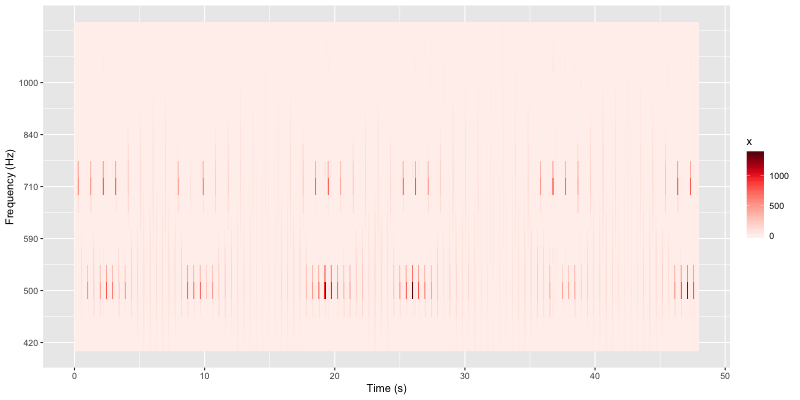

RObject{VecSxp}


In [17]:
rplot(result[2].primary_source)

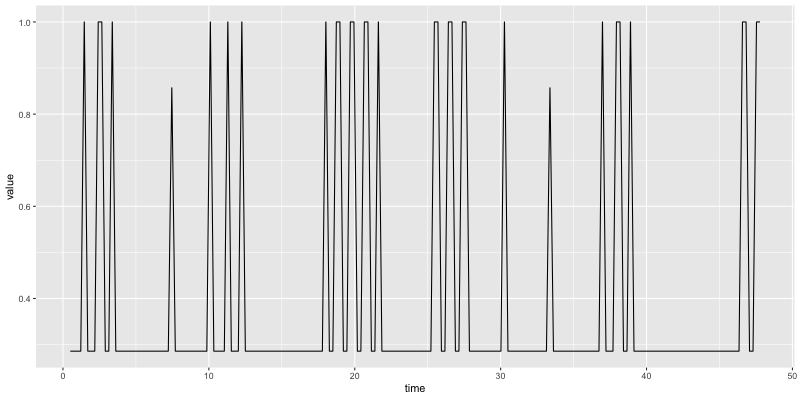

RObject{VecSxp}


In [18]:
rplot(result[2].percepts.ratio)

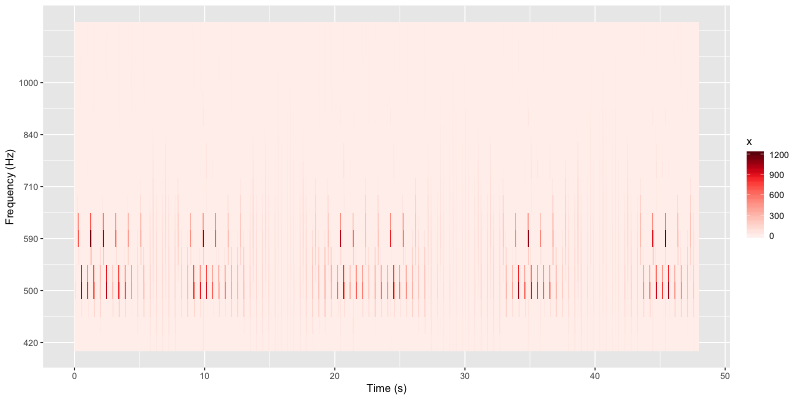

RObject{VecSxp}


In [19]:
rplot(result[1].primary_source)

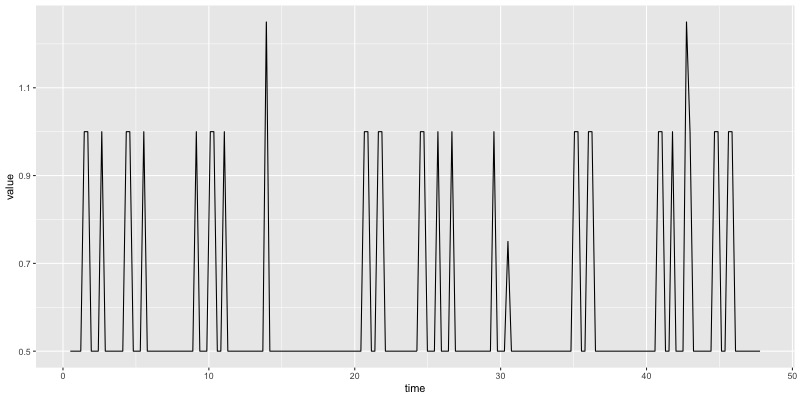

RObject{VecSxp}


In [20]:
rplot(result[1].percepts.ratio)

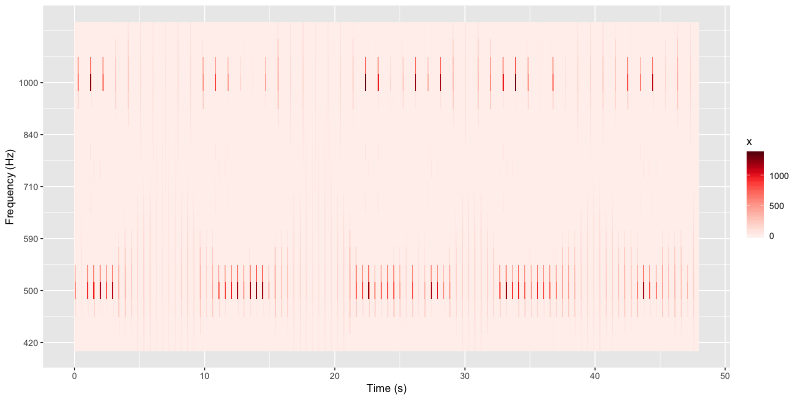

RObject{VecSxp}


In [21]:
rplot(result[3].primary_source)

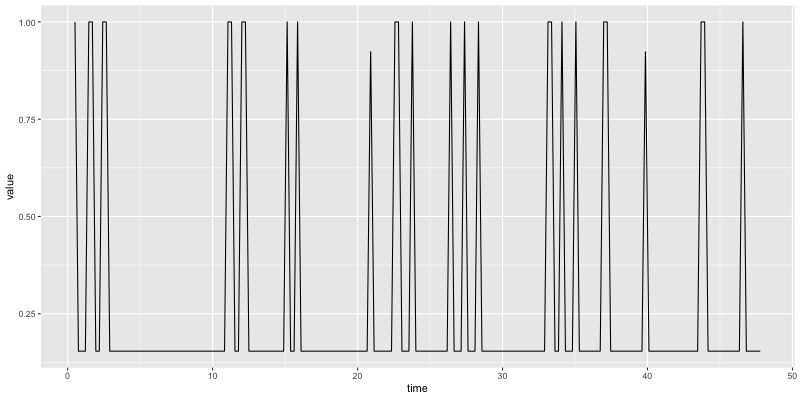

RObject{VecSxp}


In [22]:
rplot(result[3].percepts.ratio)

# Peripheral-level

In [23]:
params = getparams(paramfile) do i,row
  abs(row[:f_c_m] - 32) < 1 &&
  abs(row[:f_c_a] - 5) < 1 &&
  row[:Δf] == 6
end

Dict{Symbol,Number} with 35 entries:
  :s_W_m_σ   => 15.0
  :s_τ_x     => 500.0 ms
  :f_τ_m     => 350.0 ms
  :t_W_m_σ_N => 3.0
  :f_τ_x     => 500.0 ms
  :t_τ_σ     => 500.0 ms
  :f_τ_σ     => 500.0 ms
  :Δf        => 6
  :s_τ_a     => 3000.0 ms
  :t_τ_x     => 500.0 ms
  :s_W_m_c   => 6.0
  :f_W_m_c   => 6.0
  :t_W_m_σ_ϕ => 7.0
  :t_τ_m     => 350.0 ms
  :t_τ_a     => 3000.0 ms
  :s_c_a     => 0.0
  :t_c_σ     => 0.0
  :s_c_x     => 3.0
  :s_τ_m     => 350.0 ms
  :Δt        => 240.0 ms
  :s_c_σ     => 0.0
  :f_τ_a     => 3000.0 ms
  :s_c_m     => 0.0
  :f_c_a     => 5.01187
  :t_W_m_c   => 6.0
  ⋮          => ⋮

In [24]:
result = []
for d in [3,6,12]
  @show d
  params[:Δf] = d
  push!(result,bistable_model(50,params,settings,intermediate_results=true))
end

d = 3
full_band_ratio = 4.1
d = 6
full_band_ratio = 4.1
d = 12
full_band_ratio = 4.1


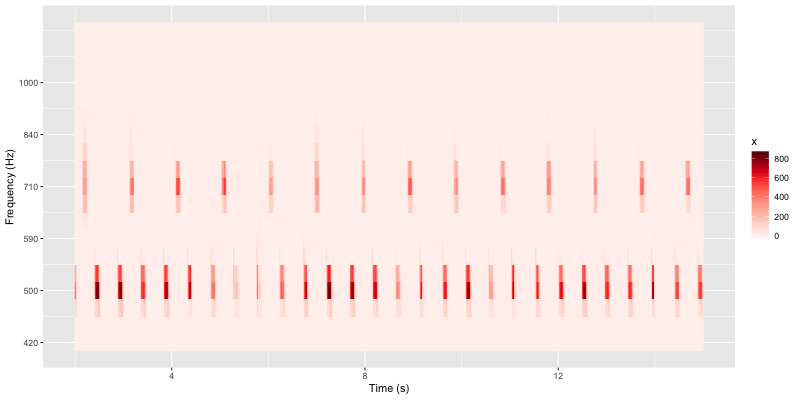

RObject{VecSxp}


In [25]:
rplot(result[2].primary_source[2s .. 15s])

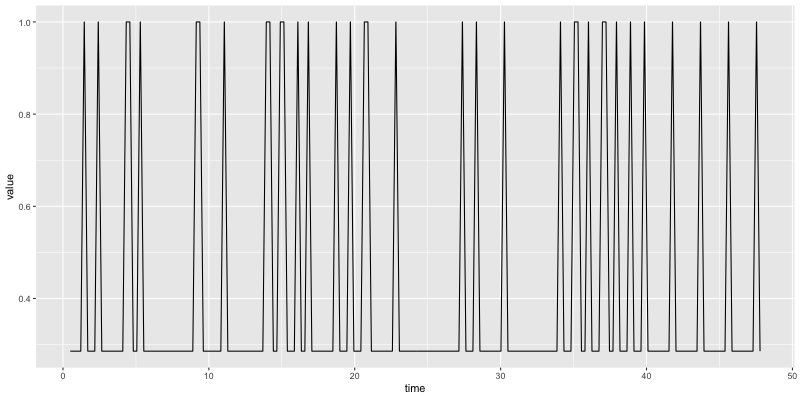

RObject{VecSxp}


In [26]:
rplot(result[2].percepts.ratio)

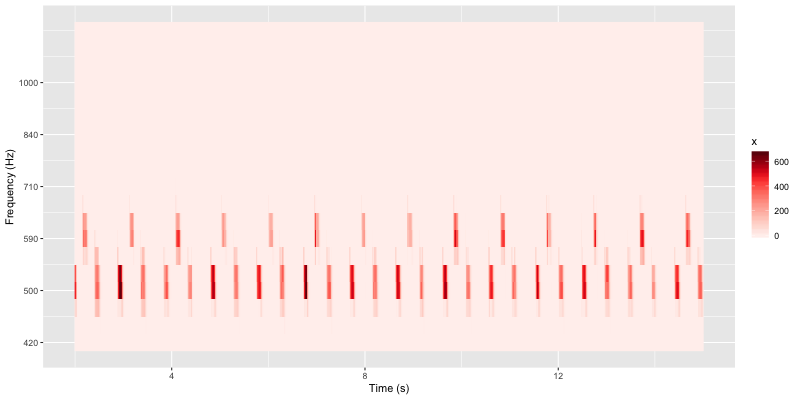

RObject{VecSxp}


In [27]:
rplot(result[1].primary_source[2s .. 15s])

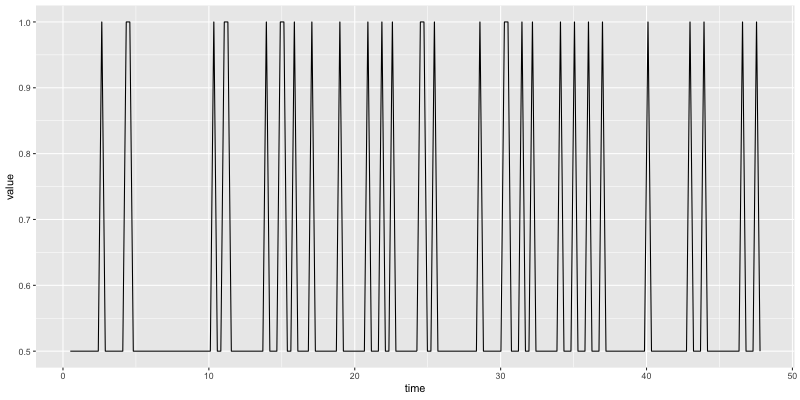

RObject{VecSxp}


In [28]:
rplot(result[1].percepts.ratio)

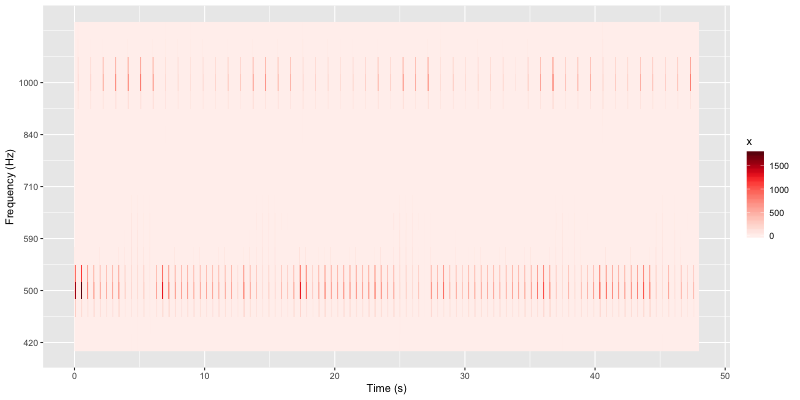

RObject{VecSxp}


In [29]:
rplot(result[3].primary_source)

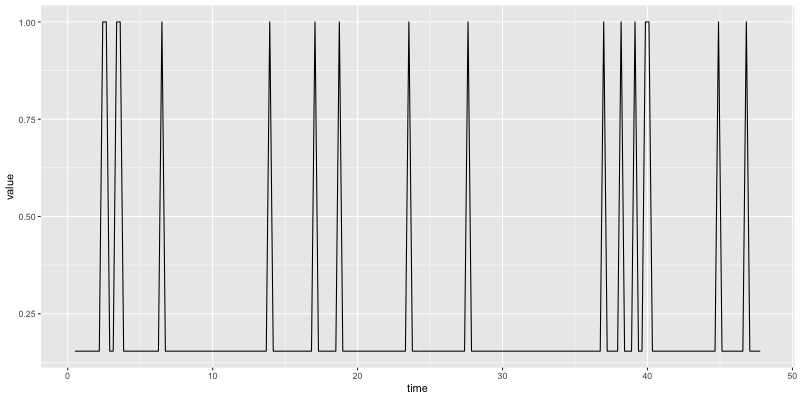

RObject{VecSxp}


In [30]:
rplot(result[3].percepts.ratio)